In [1]:
import numpy as np

from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold,cross_val_score,train_test_split
import matplotlib.image as Image
import PIL.Image as Image


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
m_check = ModelCheckpoint("model/--{epoch:02d}--{val_loss:.4f}.hdf5", monitor = 'val_loss',save_best_only=True)


In [3]:
x = np.load("../train.npy")
print(x[0])

y = np.load("y.npy")


[[[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]
  [0.2        0.2        0.2       ]
  ...
  [0.2        0.2        0.2       ]
  [0.36470588 0.36470588 0.36470588]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [0.18431373 0.18431373 0.18431373]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.18431373 0.18431373 0.18431373]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.36470588 0.36470588 0.36470588]


In [4]:
def create_model():
    n = 16
    model = Sequential()
    model.add(Conv2D(n*16,(3,3),padding='same',activation='relu',input_shape=(112,150,3)))
    model.add(Conv2D(n*8,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(n*4,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(n*2,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(n*4,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(n*2,activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(9,activation="softmax"))

    model.compile(optimizer="adamax",loss="categorical_crossentropy",metrics=['acc'])

    return model


In [5]:
seed = np.random.seed(7)

kf = KFold(n_splits=3, shuffle=True,random_state=seed)


In [6]:

x_train,x_test , y_train,y_test = train_test_split(x,y,shuffle=True , random_state=seed)

In [7]:
# history = []
# model = create_model()
# for train_i,test_i in kf.split(x):
#     train_x,train_y = x[train_i],y[train_i]
#     test_x, test_y = x[test_i], y[test_i]

#     hist = model.fit(train_x,train_y,batch_size=30,epochs=50,validation_split=0.25,callbacks=[m_check])
#     history.append(hist)
#     score = model.evaluate(test_x,test_y)
#     print(score)

Epoch 1/50
75/75 [==============================] - 12s 161ms/step - loss: 2.0798 - acc: 0.1804 - val_loss: 2.7860 - val_acc: 0.0000e+00
Epoch 2/50
75/75 [==============================] - 5s 65ms/step - loss: 1.9139 - acc: 0.2600 - val_loss: 2.8541 - val_acc: 0.0507
Epoch 3/50
75/75 [==============================] - 5s 65ms/step - loss: 1.6218 - acc: 0.3924 - val_loss: 3.4229 - val_acc: 0.0573
Epoch 4/50
75/75 [==============================] - 5s 65ms/step - loss: 1.2142 - acc: 0.5444 - val_loss: 4.0191 - val_acc: 0.1000
Epoch 5/50
75/75 [==============================] - 5s 65ms/step - loss: 0.9521 - acc: 0.6373 - val_loss: 4.4859 - val_acc: 0.1027
Epoch 6/50
75/75 [==============================] - 5s 65ms/step - loss: 0.8101 - acc: 0.6973 - val_loss: 5.4004 - val_acc: 0.1093
Epoch 7/50
75/75 [==============================] - 5s 66ms/step - loss: 0.6476 - acc: 0.7609 - val_loss: 7.6340 - val_acc: 0.1147
Epoch 8/50
75/75 [==============================] - 5s 66ms/step - loss: 0.55

KeyboardInterrupt: 

In [8]:
history = model.fit(x_train,y_train,batch_size=30,epochs=50,validation_split=0.25,callbacks=[m_check])

Epoch 1/50
85/85 [==============================] - 6s 73ms/step - loss: 2.0368 - acc: 0.5946 - val_loss: 2.4034 - val_acc: 0.1107
Epoch 2/50
85/85 [==============================] - 6s 73ms/step - loss: 1.1251 - acc: 0.6511 - val_loss: 2.1242 - val_acc: 0.1227
Epoch 3/50
85/85 [==============================] - 6s 71ms/step - loss: 0.9163 - acc: 0.6800 - val_loss: 1.7561 - val_acc: 0.3467
Epoch 4/50
85/85 [==============================] - 6s 71ms/step - loss: 0.7363 - acc: 0.7377 - val_loss: 1.4208 - val_acc: 0.5840
Epoch 5/50
85/85 [==============================] - 6s 65ms/step - loss: 0.6078 - acc: 0.7922 - val_loss: 1.0979 - val_acc: 0.7467
Epoch 6/50
85/85 [==============================] - 6s 65ms/step - loss: 0.5103 - acc: 0.8273 - val_loss: 0.8753 - val_acc: 0.8600
Epoch 7/50
85/85 [==============================] - 5s 65ms/step - loss: 0.4428 - acc: 0.8451 - val_loss: 0.6002 - val_acc: 0.9160
Epoch 8/50
85/85 [==============================] - 6s 65ms/step - loss: 0.4100 - a

In [9]:
predy = model.evaluate(x_test,y_test)
print(predy)

36/36 [==============================] - 1s 27ms/step - loss: 0.1528 - acc: 0.9582
[0.15279662609100342, 0.9582222104072571]


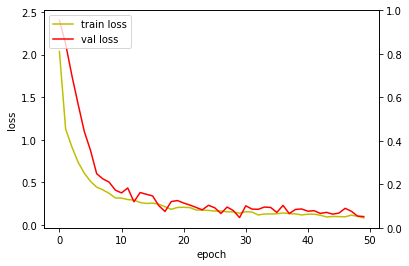

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')


plt.show()

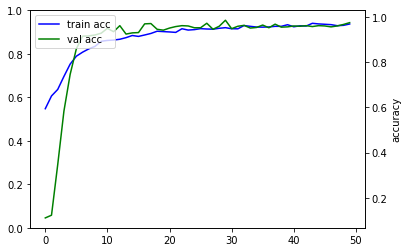

In [12]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history


acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()